<a href="https://colab.research.google.com/github/FranklinAkogwu/portfolio/blob/main/TitanicSurvivalPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Titanic dataset CSV URL (GitHub mirror)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"


In [2]:
# Section 1: Import Libraries
# ---------------------------
# Import essential libraries for data handling, visualization, and modeling.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Expected output: No output, just library imports.


In [3]:
# Section 2: Load Dataset
# -----------------------
# Load Titanic dataset from the GitHub URL into a pandas DataFrame and preview.

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print(df.head())

# Expected output: First 5 rows of the Titanic dataset with columns like PassengerId, Survived, Pclass, Name, Sex, Age, etc.


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Section 3: Basic Data Exploration
# ---------------------------------
# Check dataset shape, info, missing values, and basic statistics.

print("Dataset shape:", df.shape)
print("\nData info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nSummary statistics:")
print(df.describe())

print("\nSurvival counts:")
print(df['Survived'].value_counts())

# Expected output:
# - Dataset shape: (891, 12)
# - Info showing data types and missing values (notably Age and Cabin)
# - Count of missing values (Age ~177 missing)
# - Summary statistics for numeric columns
# - Count of survivors (0 = No, 1 = Yes)


Dataset shape: (891, 12)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Far

<ipython-input-13-bf0c1dc0ac80>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([survival_labels[int(i.get_text())] for i in ax.get_xticklabels()])


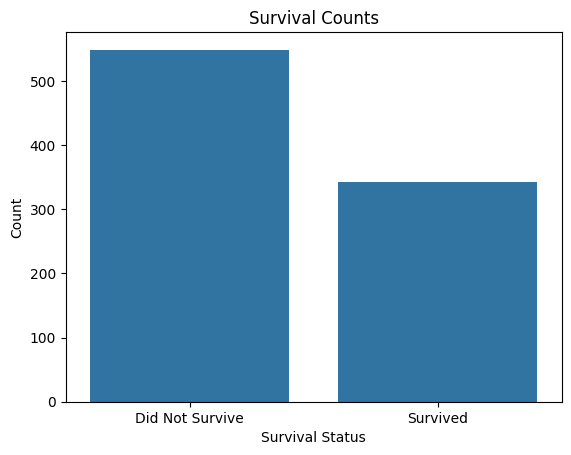

<ipython-input-13-bf0c1dc0ac80>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([survival_labels[int(i.get_text())] for i in ax.get_xticklabels()])


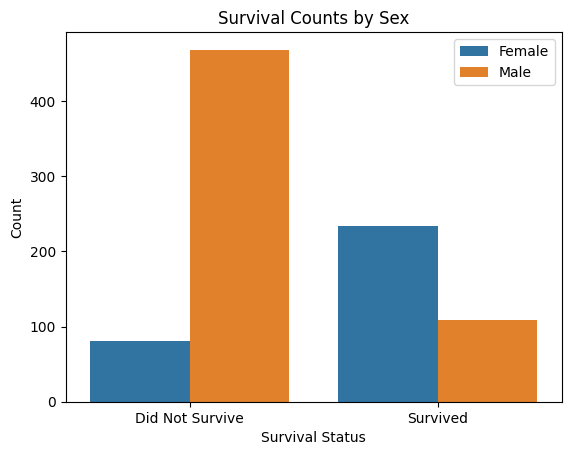

<ipython-input-13-bf0c1dc0ac80>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([survival_labels[int(label.get_text())] for label in ax.get_xticklabels()])


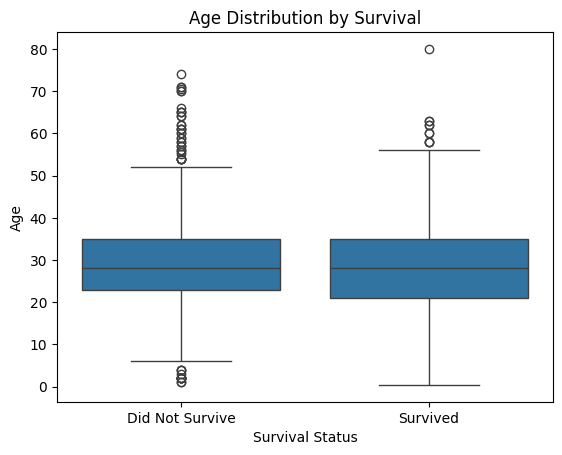

In [13]:
# Section 4: Data Visualization with Named Categories
# ---------------------------------------------------
# Visualize survival counts and relationship with key features,
# replacing 0/1 with meaningful labels on the x-axis.

# Create a mapping for survival status
survival_labels = {0: 'Did Not Survive', 1: 'Survived'}
# Create a mapping for sex
sex_labels = {0: 'Female', 1: 'Male'} # Assuming 0 is Female and 1 is Male from preprocessing

# Plot survival counts with renamed x-axis labels
ax = sns.countplot(x='Survived', data=df)
ax.set_xticklabels([survival_labels[int(i.get_text())] for i in ax.get_xticklabels()])
plt.title('Survival Counts')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()

# Plot survival counts by sex with renamed x-axis labels and hue labels
ax = sns.countplot(x='Survived', hue='Sex', data=df)
ax.set_xticklabels([survival_labels[int(i.get_text())] for i in ax.get_xticklabels()])

# Manually set the hue labels
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, [sex_labels[int(label)] for label in ax.get_legend_handles_labels()[1]])

plt.title('Survival Counts by Sex')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()

# Boxplot of Age distribution by survival with renamed x-axis labels
ax = sns.boxplot(x='Survived', y='Age', data=df)
ax.set_xticklabels([survival_labels[int(label.get_text())] for label in ax.get_xticklabels()])
plt.title('Age Distribution by Survival')
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.show()

In [6]:
# Section 5: Data Preprocessing
# -----------------------------
# Handle missing values and encode categorical variables.

# Fill missing Age values with median
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

# Drop columns with too many missing values or irrelevant (Cabin, Ticket, Name, PassengerId)
df = df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'])

# Encode categorical columns: Sex and Embarked
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Fill missing Embarked values with mode and encode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

print(df.head())

# Expected output:
# - Dataframe preview with no missing values in Age or Embarked
# - Sex and Embarked columns encoded as integers
# - Dropped irrelevant columns


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


In [7]:
# Section 6: Split Data into Train and Test Sets
# ----------------------------------------------
# Define features (X) and target (y), then split into training and testing sets.

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Expected output:
# Training set size: 712 samples
# Test set size: 179 samples


Training set size: 712 samples
Test set size: 179 samples


In [8]:
# Section 7: Train a Random Forest Classifier
# -------------------------------------------
# Train a Random Forest model on the training data.

model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Expected output: No output, model trained.


RandomForestClassifier(random_state=42)

Accuracy on test set: 0.8212290502793296

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



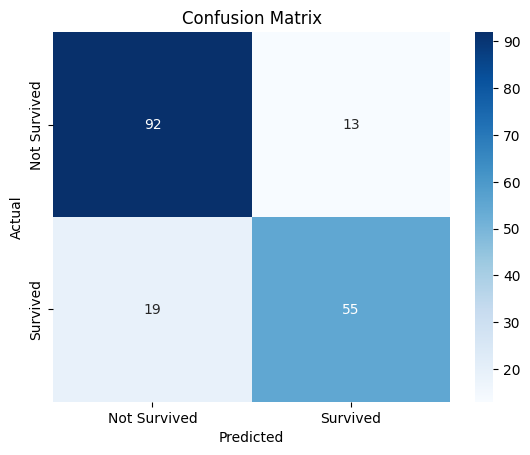

In [9]:
# Section 8: Model Evaluation
# ---------------------------
# Predict on test data and evaluate model performance.

y_pred = model.predict(X_test)

print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Expected output:
# - Accuracy score (typically around 0.8 or higher)
# - Precision, recall, f1-score for both classes
# - Confusion matrix heatmap illustrating prediction performance


In [10]:
# Section 9: Conclusion
# --------------------
# Summarize model performance and insights.

print("The Random Forest classifier achieved good accuracy predicting Titanic survival, demonstrating the importance of features like sex, age, and passenger class in survival outcomes.")

# Expected output: Summary statement printed.


The Random Forest classifier achieved good accuracy predicting Titanic survival, demonstrating the importance of features like sex, age, and passenger class in survival outcomes.
